In [1]:
import sys 
sys.path.insert(-1,"../")
from mazeAgentUtils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions
   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

../mazeAgentUtils.py:778: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


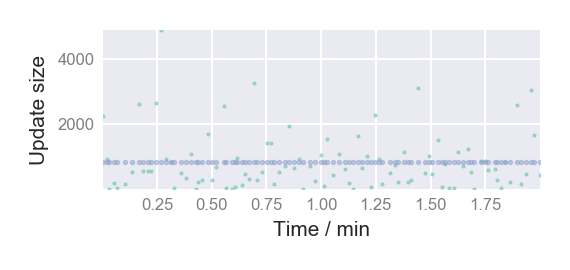

In [6]:
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T


params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 5,          #maze size scaling parameter, metres
          'dt'                 : 0.001,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 5,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : centres,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : 2*np.pi,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 1,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':100       
}

agent =  MazeAgent(params)
agent.pos, agent.dir = np.array([0.1,0.1]), np.array([1,0])
agent.runRat(2)

(<Figure size 600x600 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98f7f869e8>)

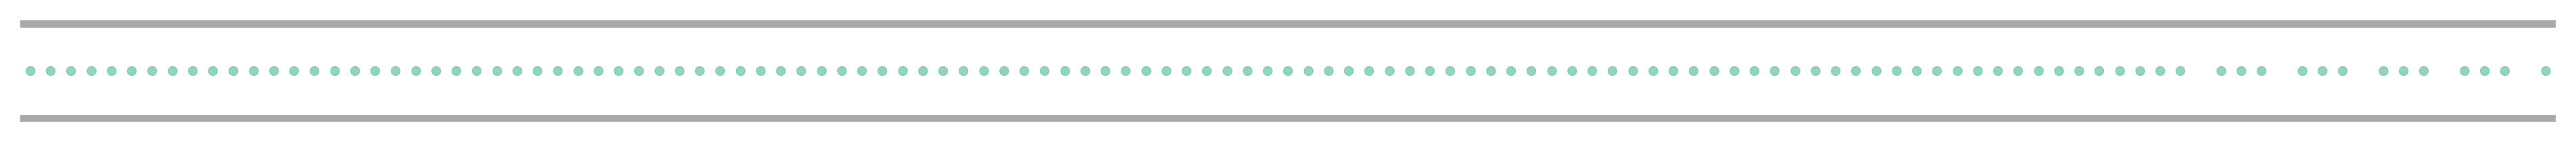

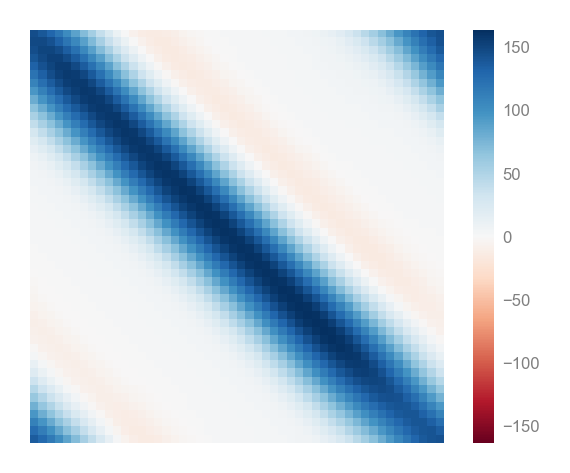

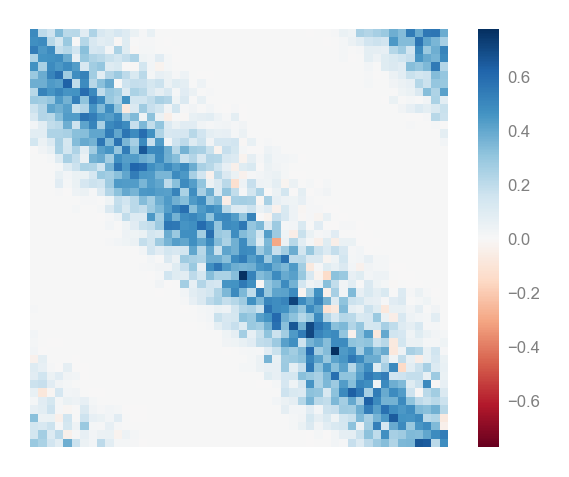

In [15]:
plotter = Visualiser(agent)
plotter.plotTrajectory(starttime=0, endtime=agent.t/60, skiprate=1000)
plotter.plotM()
plotter.plotM(STDP=True)

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
50
   checking basis cells aren't too close
     min seperation distance:  10.0 cm
       11  overlapping pairs
       2  overlapping pairs
       0  overlapping pairs
   calculating state vector at all discretised positions
   initialising STDP weight matrix and traces


  0%|          | 0/4800 [00:00<?, ?it/s]

Calculating place and grid cells


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb26f36bf60>)

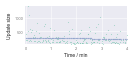

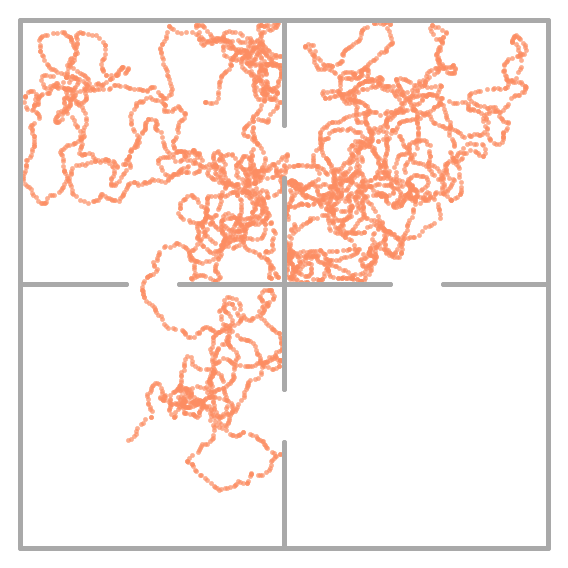

In [51]:
#Default parameters for MazeAgent 
params = { 
          'mazeType'           : 'fourRooms',  #type of maze, define in getMaze() function
          'stateType'          : 'gaussian', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 1,          #maze size scaling parameter, metres
          'dt'                 : 0.05,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 2,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : None,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : None,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 0.3,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':1000       
}

agent =  MazeAgent(params)
plotter = Visualiser(agent)
# fig, ax = plotter.plotFeatureCells(shufflebeforeplot=False)

agent.runRat(4,STDPLearn=False)

plotter = Visualiser(agent)
plotter.plotTrajectory(starttime=0, endtime=agent.t/60, skiprate=1,color='C1')

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
50
   checking basis cells aren't too close
     min seperation distance:  10.0 cm
       34  overlapping pairs
       31  overlapping pairs
       20  overlapping pairs
       22  overlapping pairs
       16  overlapping pairs
       15  overlapping pairs
       13  overlapping pairs
       20  overlapping pairs
       12  overlapping pairs
       16  overlapping pairs
       11  overlapping pairs
     min seperation distance:  9.0 cm
       9  overlapping pairs
       8  overlapping pairs
       5  overlapping pairs
       10  overlapping pairs
       8  overlapping pairs
       7  overlapping pairs
       4  overlapping pairs
       6  overlapping pairs
       6  overlapping pairs
       4  overla

  0%|          | 0/480 [00:00<?, ?it/s]

Calculating place and grid cells


(<Figure size 4800x240 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb237daa390>)

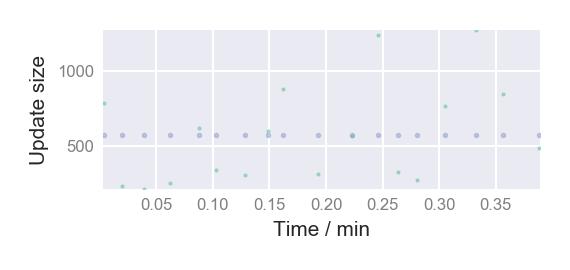

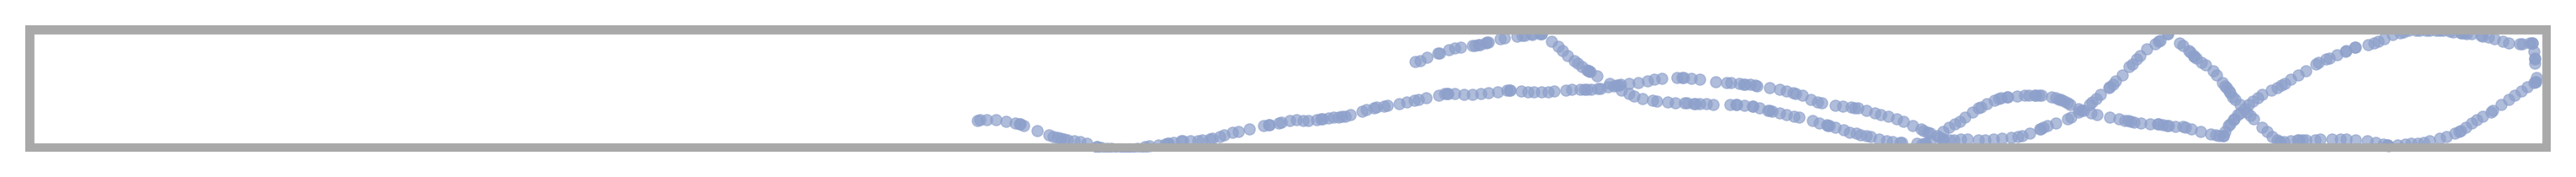

In [58]:
#Default parameters for MazeAgent 
params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'gaussian', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 4,          #maze size scaling parameter, metres
          'dt'                 : 0.05,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 2,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : None,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : 0.5*np.pi,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 0.3,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : True,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':1000       
}

agent =  MazeAgent(params)
plotter = Visualiser(agent)
# fig, ax = plotter.plotFeatureCells(shufflebeforeplot=False)

agent.pos=np.array([1.5,0.05])
agent.runRat(0.4,STDPLearn=False)

plotter = Visualiser(agent)
plotter.plotTrajectory(starttime=0, endtime=agent.t/60, skiprate=1,color='C2')

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
50
   checking basis cells aren't too close
     min seperation distance:  10.0 cm
       30  overlapping pairs
       21  overlapping pairs
       24  overlapping pairs
       23  overlapping pairs
       27  overlapping pairs
       24  overlapping pairs
       19  overlapping pairs
       15  overlapping pairs
       17  overlapping pairs
       14  overlapping pairs
       13  overlapping pairs
     min seperation distance:  9.0 cm
       9  overlapping pairs
       7  overlapping pairs
       4  overlapping pairs
       7  overlapping pairs
       7  overlapping pairs
       3  overlapping pairs
       3  overlapping pairs
       6  overlapping pairs
       4  overlapping pairs
       5  overlap

  0%|          | 0/480 [00:00<?, ?it/s]

Calculating place and grid cells


(<Figure size 4800x240 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb237f59f28>)

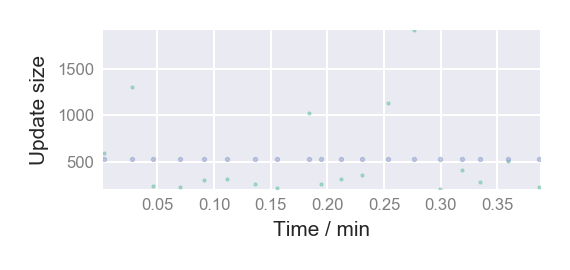

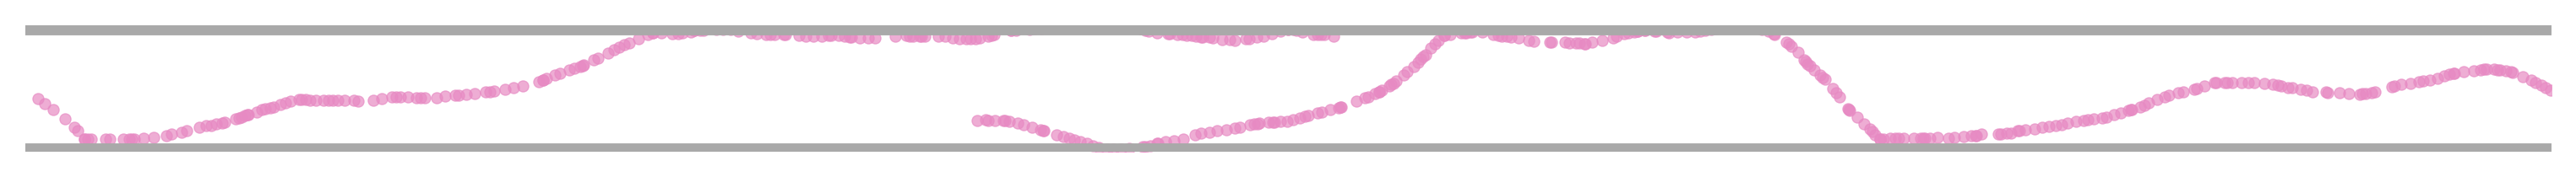

In [59]:
#Default parameters for MazeAgent 
params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'gaussian', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'raudies',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 4,          #maze size scaling parameter, metres
          'dt'                 : 0.05,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 2,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : None,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : 0.5*np.pi,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 0.3,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':1000       
}

agent =  MazeAgent(params)
plotter = Visualiser(agent)
# fig, ax = plotter.plotFeatureCells(shufflebeforeplot=False)

agent.pos=np.array([1.5,0.05])
agent.runRat(0.4,STDPLearn=False)

plotter = Visualiser(agent)
plotter.plotTrajectory(starttime=0, endtime=agent.t/60, skiprate=1,color='C3')

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions
   initialising STDP weight matrix and traces


  0%|          | 0/12000 [00:00<?, ?it/s]

../mazeAgentUtils.py:778: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


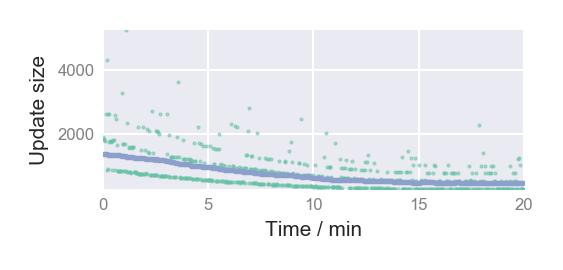

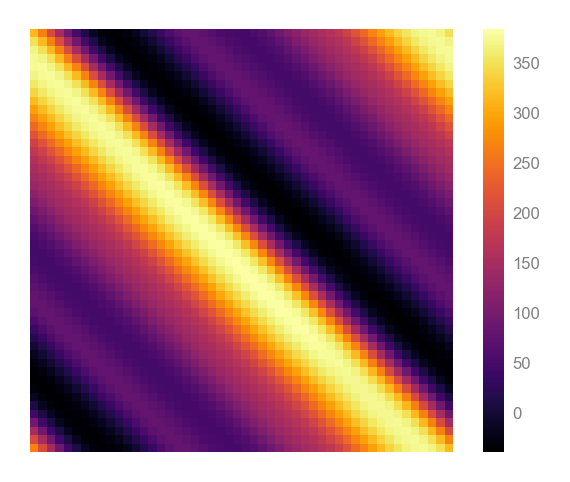

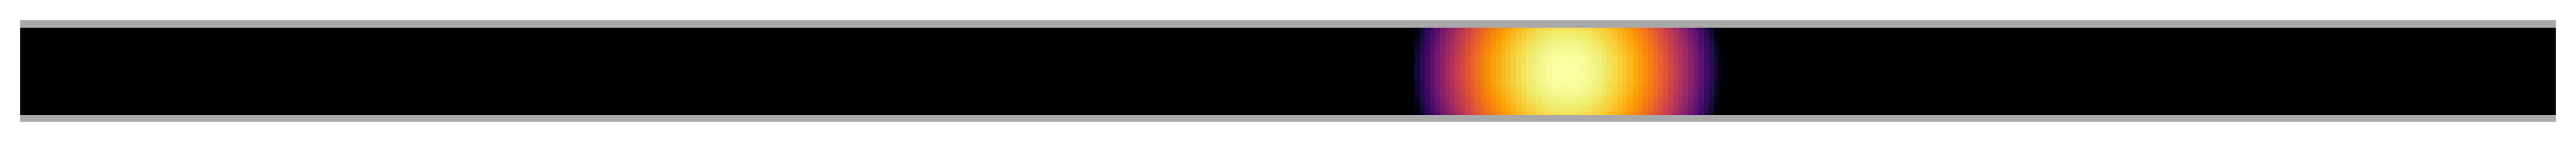

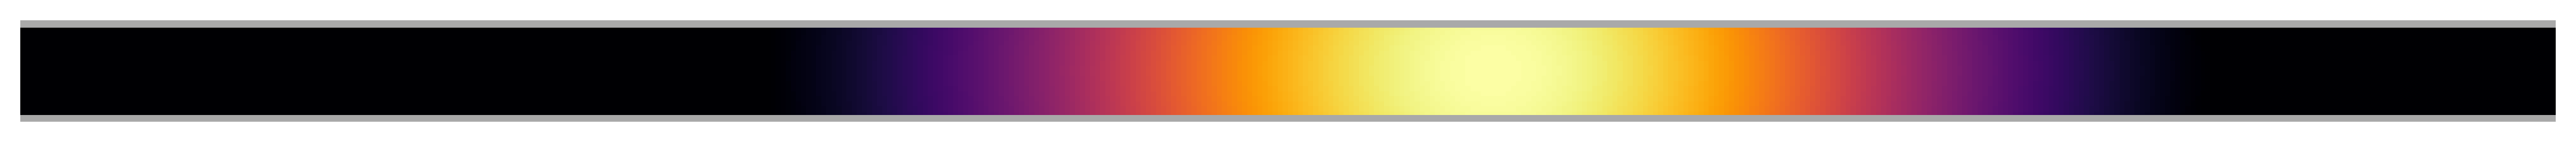

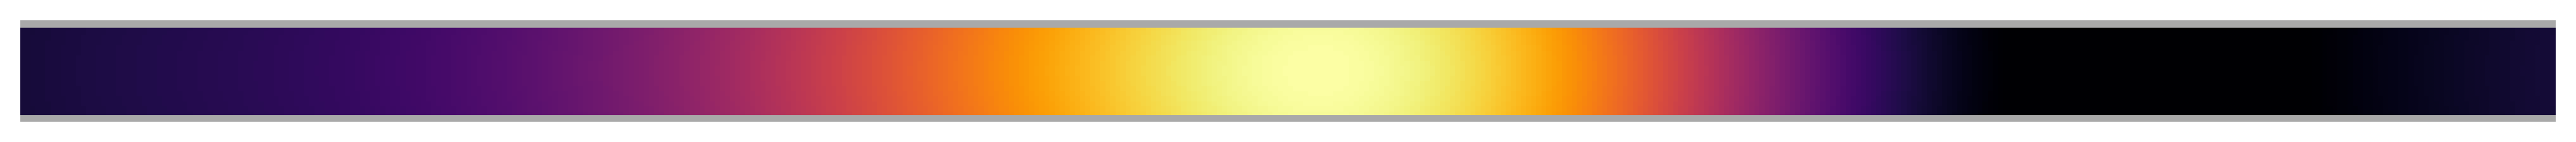

In [108]:
#Default parameters for MazeAgent 
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T


params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 5,          #maze size scaling parameter, metres
          'dt'                 : 0.1,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 10,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : centres,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : 0.5*np.pi,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 1,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':1000       
}

agent =  MazeAgent(params)
plotter = Visualiser(agent)
# fig, ax = plotter.plotFeatureCells(shufflebeforeplot=False)

agent.pos=np.array([1.5,0.05])
agent.dir = np.array([1,0])
agent.runRat(20,STDPLearn=False,saveEvery=0.2)

plotter = Visualiser(agent)
plotter.plotM()
plotter.plotPlaceField(number=30,hist_id=0)
plotter.plotPlaceField(number=30,hist_id=2)
plotter.plotPlaceField(number=30,hist_id=-1)
plotter.animateField(field='M')

Setting parameters
Initialising
   making state/history dataframes
   initialising velocity, position and direction
   setting time/run counters
   making the maze walls
   discretising position for later plotting
   handling undefined parameters
   initialising basis features for learning
   calculating state vector at all discretised positions
   initialising STDP weight matrix and traces


  0%|          | 0/120000 [00:00<?, ?it/s]

../mazeAgentUtils.py:778: RuntimeWarning: overflow encountered in exp
  state[distance<self.sigmas] += np.e * np.exp(-1/(1-(distance/self.sigmas)**2))[distance<self.sigmas]


Calculating place and grid cells


(<Figure size 6000x240 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb25962b7b8>)

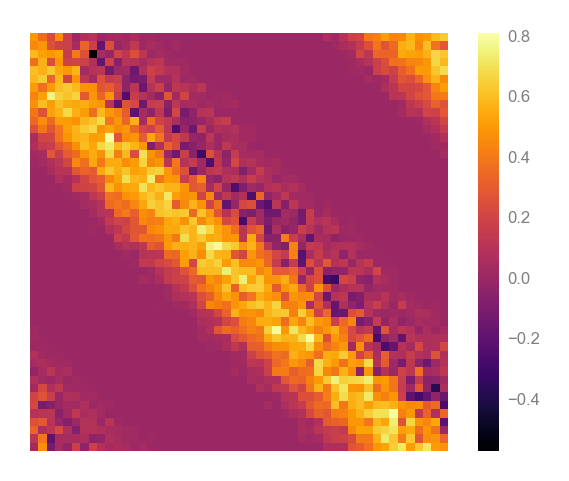

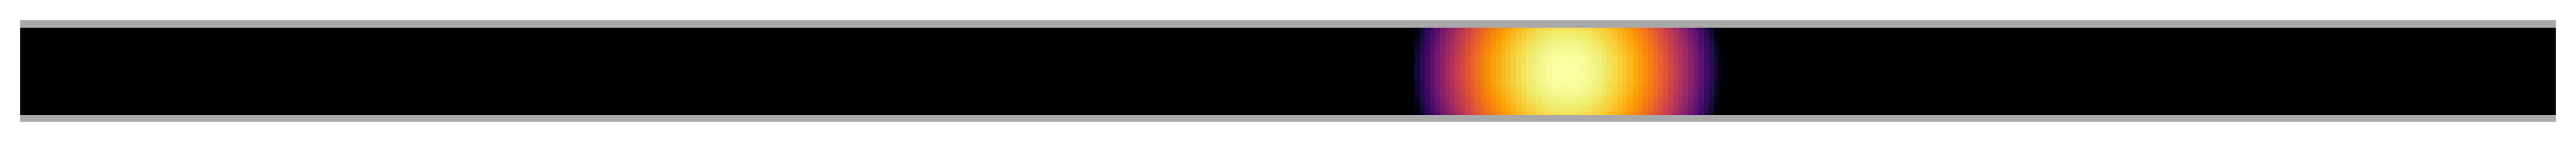

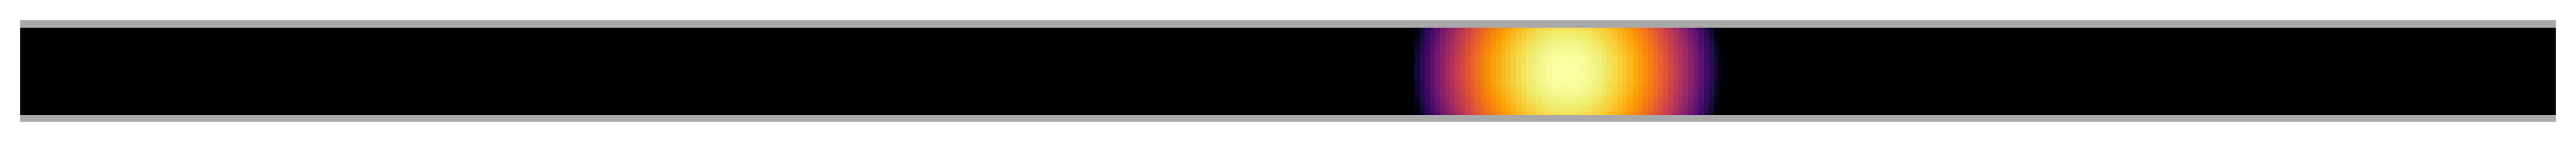

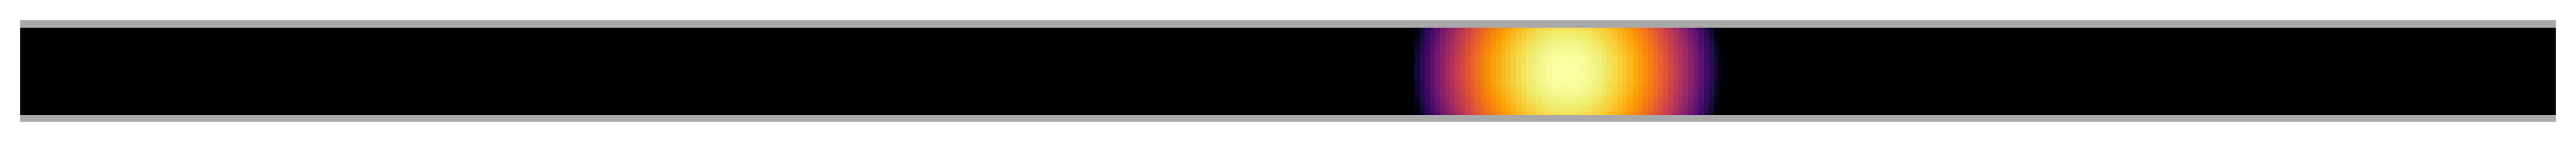

In [102]:
#Default parameters for MazeAgent 
N=50
xcen = np.linspace(0,5,N+1)[:-1]
xcen += (xcen[1] - xcen[0]) / 2
ycen = np.array([0.1]*N)
centres = np.vstack((xcen,ycen)).T


params = { 
          'mazeType'           : 'loop',  #type of maze, define in getMaze() function
          'stateType'          : 'bump', #feature on which to TD learn (onehot, gaussian, gaussianCS, fourier, circles)
          'movementPolicy'     : 'windowsScreensaver',  #movement policy (raudies, random walk, windows screensaver)
          'roomSize'           : 5,          #maze size scaling parameter, metres
          'dt'                 : 0.01,       #simulation time disretisation 
          'dx'                 : 0.01,       #space discretisation (for plotting, movement is continuous)
          'tau'                : 10,          #TD decay time, seconds
          'TDdx'               : 0.02,       #rough distance between TD learning updates, metres 
          'alpha'              : 0.01,       #TD learning rate 
          'nCells'             : 50,       #how many features to use
          'centres'            : centres,       #array of receptive field positions. Overwrites nCells
          'speedScale'         : 0.16,       #movement speed scale, metres/second
          'rotSpeedScale'      : 0.5*np.pi,       #rotational speed scale, radians/second
          'initPos'            : None,       #initial position [x0, y0], metres
          'initDir'            : None,       #initial direction, unit vector
          'sigma'              : 1,        #feature cell width scale, relevant for  gaussin, gaussianCS, circles
          'doorsClosed'        : False,       #whether doors are opened or closed in multicompartment maze
          'successorFeatureNorm':1000       
}

agent =  MazeAgent(params)
plotter = Visualiser(agent)
# fig, ax = plotter.plotFeatureCells(shufflebeforeplot=False)

agent.pos=np.array([1.5,0.05])
agent.dir = np.array([1,0])
agent.runRat(20,STDPLearn=True,TDSRLearn=False,saveEvery=0.2)

plotter = Visualiser(agent)
plotter.plotM(STDP=True)
plotter.plotPlaceField(number=30,hist_id=0)
plotter.plotPlaceField(number=30,hist_id=2)
plotter.plotPlaceField(number=30,hist_id=-1)



In [106]:
plotter.animateField(field='M')